# Nationality prediction from the name using RNN

### 1.1 Loading the data

In [ ]:
from utils.load_names import get_data_from_file
names_dict = get_data_from_file('data/nam_dict.txt')

In [ ]:
names_dict.keys()

dict_keys(['Great Britain', 'Ireland', 'U.S.A.', 'Italy', 'Portugal', 'Spain', 'France', 'the Netherlands', 'East Frisia', 'Germany', 'Swiss', 'Iceland', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Hungary', 'Romania', 'Bulgaria', 'Bosnia and Herzegovina', 'Croatia', 'Kosovo', 'Serbia', 'Albania', 'Greece', 'Russia', 'Ukraine', 'Armenia', 'Azerbaijan', 'Kazakhstan/Uzbekistan,etc.', 'Turkey', 'Arabia/Persia', 'Israel', 'China', 'India/Sri Lanka', 'Japan', 'Korea', 'Vietnam'])

In [ ]:
names_dict['Greece'][:10]

['Achilleas',
 'Achillefs',
 'Adamantia',
 'Adamantini',
 'Adamantios',
 'Aeneas',
 'Afroditi',
 'Agapi',
 'Agapios',
 'Agathi']

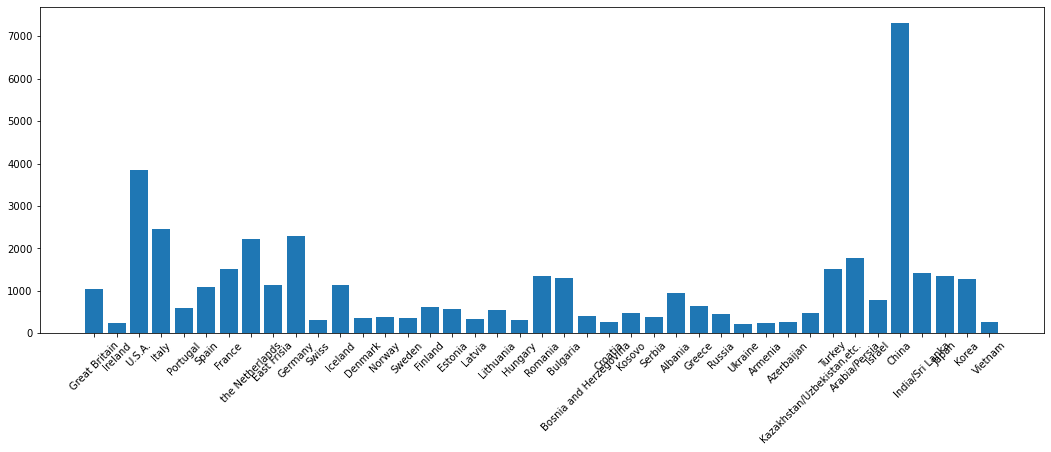

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(names_dict.keys(), [len(names_dict[i]) for i in names_dict.keys()])
plt.xticks(rotation = 45)
plt.show()

### 1.2 Pre-processing

In [ ]:
temp = ""
for name_list in names_dict.values():
    for name in name_list:
        temp += name.lower()
charset = sorted(set(temp))
charset

[' ',
 "'",
 '-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ø',
 'ú',
 'ü',
 'ý',
 'þ']

Now we can create a function that takes as input a name, and outputs a `(name length) x (charset length)` tensor.

In [ ]:
import torch

In [ ]:
def name2tensor(name):
    name = name.lower()
    
    # Create tensor of correct size filled with zeros
    tensor = torch.zeros(len(name), len(charset))
    
    # For each letter, fill in the tensor with a 1 in the position corresponding to the character index in the charset
    for i, letter in enumerate(name):
        char_index = charset.index(letter)
        tensor[i][char_index] = 1
        
    return tensor

In [ ]:
name2tensor('Ali')

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [ ]:
import torch.nn.functional as F
def name2padded_tensor(name, target_len):

    tensor = name2tensor(name)
    # YOUR CODE HERE
    tensor = F.pad(input=tensor, pad=(0,0,target_len-tensor.shape[0],0), mode='constant', value=0)
    return tensor

In [ ]:
def test_name2padded_tensor():
    test_case(case_id="1", name="Ali", target_len=5)
    test_case(case_id="2", name="Ali Baba", target_len=10)
    print("Test passed.")
    
    
def test_case(case_id, name, target_len):
    padded_tensor = name2padded_tensor("Ali", target_len)
    new_target_len, new_charset_len = padded_tensor.shape
    err_string = "Case {} failed: {}"
    
    assert new_target_len == target_len, err_string.format(case_id,
        "`target_len` not preserved, expected: {}, got: {}".format(target_len, new_target_len))
    
    assert new_charset_len == 57, err_string.format(
        "`charset_len` not preserved, expected: 57, got: {}".format(new_charset_len))
    
    assert padded_tensor[:2, :].sum() == 0, err_string.format(
        "The first two rows of the tensor should be all zeros.")
    
    assert (padded_tensor.sum(1) <= torch.ones((target_len, 1))).all(), err_string.format(
        "Every row in the tensor should sum to at most 1.")
    
    assert padded_tensor.sum() <= len(name), err_string.format(
        "The sum of all elements (i.e. the number of ones) should equal the number of characters in the name.")
    
test_name2padded_tensor()

Test passed.


In [ ]:
# YOUR CODE HERE

target_len=0
for key, val in names_dict.items():
    for i in val:
        if target_len<len(i):
            target_len = len(i)         
print(target_len)

22


Now we can go through the entire dataset, encode each of the names, and save all of it in a tensor. We'll do the same with the ground-truth labels for the countries of each name.

In [ ]:
# Create the tensors that will hold the names and labels 
# (note that the first dimension has 0 elements, this is a way to initialize an empty tensor for concatenating later)
xs = torch.zeros(0, target_len, len(charset))
ys = torch.zeros(0, dtype=torch.long)

for i, country in enumerate(names_dict.keys()):
    
    # Apply the name2padded_tensor function to each name in this country
    temp = map(
        lambda n: name2padded_tensor(n, target_len), 
        names_dict[country])
    
    # Add a new dimension to the resulting tensors
    temp = [name_tensor[None, :, :] for name_tensor in temp]
    
    # Concatenate all of them along this new dimension
    names_tensor = torch.cat(temp, dim=0)
    
    # Add these tensors to `xs`
    # Note that we have 44504 data pairs (x,y) where a single input x has the shape (target_len, 57),
    # where 57 is the length of the one-hot-encoded vectors.
    xs = torch.cat([xs, names_tensor], dim=0)
    
    # Create tensor filled with i`s and add that to the ground-truth tensor
    ys_for_this_country = torch.zeros(names_tensor.shape[0], dtype=torch.long) + i
    ys = torch.cat([ys, ys_for_this_country])    

In [ ]:
xs.shape

torch.Size([44504, 22, 57])

In [ ]:
ys.shape

torch.Size([44504])

Now we can create a dataset with these tensors.

In [ ]:
from torch.utils.data import TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = TensorDataset(xs.to(device), ys.to(device))

And split it in training, validation, and test sets.

In [ ]:
from torch.utils.data import random_split

val_ratio = 0.15
test_ratio = 0.15

n_samples = len(dataset)
n_val_samples = int(n_samples*val_ratio)
n_test_samples = int(n_samples*test_ratio)
n_train_samples = n_samples-n_val_samples-n_test_samples

train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train_samples, n_val_samples, n_test_samples])

### 1.3 Defining the optimization

In [ ]:
import torch.nn as nn
import numpy as np

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Inputs:
            input_size     - Dimensionality of the input of this RNN.
            hidden_size    - Dimensionality of the hidden state.
            output_size    - Dimensionality of the output of this RNN.
        """
        
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        
        # YOUR CODE HERE
        # Weight matrices
        self.Wh = nn.Linear(self.input_size, self.hidden_size, bias=False)
        self.U = nn.Linear(self.hidden_size, self.hidden_size)
        self.Wy = nn.Linear(self.hidden_size, self.output_size)
        
    def forward(self, x, h):      
        """
        Runs the RNN module for one time-step.
        Inputs:
            x              - Batch of one-hot encoded characters. 
                             Tensor of size (BATCH SIZE x CHARSET LENGTH).
            h              - Batch of hidden states at previous time-step.
                             Tensor of size (BATCH SIZE x `hidden_size`).
        
        Returns:
            y              - Batch of outputs.
                             Tensor of size (BATCH SIZE x NUMBER OF COUNTRIES).
            new_h          - Batch of hidden states at current time-step.
                             Tensor of size (BATCH SIZE x `hidden_size`).
        """
        
        # YOUR CODE HERE
        new_h = torch.tanh(self.Wh(x) + self.U(h))
        lsm=nn.LogSoftmax(dim=1)
        y = self.Wy(new_h)
        y=lsm(y)
        return y, new_h

In [ ]:
# Create a test tensor of size (1 x CHARSET LENGTH)
t = torch.ones((1,len(charset))).to(device)

# Forward-prop through the RNN
rnn = RNN(len(charset), 3, len(names_dict)).to(device)
h = torch.ones((1, 3)).to(device)
y, new_h = rnn(t, h)

# Test dimensions of the outputs
err_str = 'The {} has incorrect dimension. Dimension is {}, but should\'ve been {}'
assert list(y.shape) == [1, len(names_dict)], err_str.format('output', list(y.shape), [1, len(names_dict)])
assert list(new_h.shape) == [1, 3], err_str.format('new hidden state', list(new_h.shape), [1, 3])

print('Test passed.')

Test passed.


We will use the Adam optimizer:

In [ ]:
from torch.optim import Adam

In [ ]:
# Compute weights for each class
n_names_for_each_country = [len(v) for v in names_dict.values()]
ns = torch.tensor(n_names_for_each_country, dtype=torch.float)
w = 1.0 / ns
w = w / w.sum()

# Define loss
criterion = nn.NLLLoss(weight=w.to(device))

### 1.4 Helper functions for training

In [ ]:
def batch_forward_prop(rnn, xs, ys):  
    """
    Inputs:
        rnn            - The RNN model, instance of the RNN class.
        xs             - Batch of input words.
                         Tensor of shape (BATCH SIZE x `target_len` x CHARSET LENGTH).
        ys             - Batch of ground-truth labels.
                         Tensor of  shape (BATCH_SIZE).
    
    Returns:
        output         - Output computed at the last character position in the batch.
                         Tensor of shape (BATCH_SIZE x NUMBER OF COUNTRIES).
        loss           - Value of the average loss across the predictions for this batch, later used for back-propagation.
                         Tensor with a single element inside.
    """
    
    # YOUR CODE HERE
    hidden = torch.zeros((1,rnn.hidden_size)).to(device)
    for i in range(xs.shape[1]):
        temp=xs[:,i,:]
        output, hidden = rnn(temp, hidden)
    loss = criterion(output,ys)
    return output, loss

In [ ]:
def test_rnn():
    # Create two tensors
    t1 = name2tensor('Unit')
    t2 = name2tensor('Test')

    # Add the batch dimension to them and concatenate
    t = torch.cat([t1[None, :], t2[None, :]], dim=0)

    # Create label tensor
    l = torch.ones((2), dtype=torch.long)

    # Create RNN
    rnn = RNN(len(charset), 10, len(names_dict))

    # Put everything in the correct device
    t = t.to(device)
    l = l.to(device)
    rnn.to(device)

    # Perform the forward-prop
    y, loss = batch_forward_prop(rnn, t, l)

    # Test dimensions of the outputs
    err_str = 'The {} has incorrect dimension. Dimension is {}, but should\'ve been {}'
    assert list(y.shape) == [2, len(names_dict)], err_str.format('output', list(y.shape), [2, len(names_dict)])
    assert list(loss.shape) == [], err_str.format('loss', list(loss.shape), [])

    print('Test passed.')
    
test_rnn()

Test passed.


In [ ]:
from torch.nn.utils import clip_grad_norm

def train_batch(rnn, xs, ys, optimizer):
    
    # Compute the output for all samples in the batch and the average loss
    output, loss = batch_forward_prop(rnn, xs, ys)
    
    # Zero gradients before computing backward-propagation
    optimizer.zero_grad()

    # Backward-propagation
    loss.backward()
    
    # Clip the gradient norm (optional, helps to stabilize training)
    nn.utils.clip_grad_norm_(rnn.parameters(), 2)
    
    # Perform one step of optimization
    optimizer.step()
    
    return output, loss

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics_on_validation_set(rnn, val_dataset):
    # Get all the input and labels in the training set.
    x_val, y_val = val_dataset[:]
    
    # Perform forward-prop in the entire validation set, with autograd disabled
    with torch.no_grad():
        val_output, val_loss = batch_forward_prop(rnn, x_val, y_val)
    
    # Get numpy arrays for the true labels and the predictions
    y_true = y_val.cpu().numpy()
    y_pred = val_output.argmax(dim=1).cpu().numpy()
    
    # Compute precision, recall, and F-score
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    
    return val_loss, precision, recall, fscore

In [ ]:
def plot_metrics(fig, ax, ns, train_losses, train_fscores, val_losses, val_fscores):

    # Plot losses
    ax[0].clear()
    ax[0].plot(ns, train_losses)
    ax[0].plot(ns, val_losses)
    ax[0].set_title('Loss')
    ax[0].legend(['Train','Validation'])
    ax[0].set_xlabel('Number of trained batches')
    ax[0].grid()

    # Plot F1-scores
    ax[1].clear()
    ax[1].plot(ns, train_fscores)
    ax[1].plot(ns, val_fscores)
    ax[1].plot(ns, [0.3]*len(ns), 'k--')
    ax[1].set_title('Macro F1-score')
    ax[1].legend(['Train','Validation', 'F1-score threshold'])
    ax[1].set_xlabel('Number of trained batches')
    ax[1].grid()
    
    
    fig.canvas.draw()

In [ ]:
from torch.utils.data import DataLoader

def train(rnn, n_epochs, learning_rate, batch_size, train_dataset, val_dataset):
    
    # Setup the figure for plotting progress during training
    %matplotlib notebook
    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    plt.ion()
    plot_interval = 100
    
    # Create arrays to average training metrics across batches
    preds = []
    labels = []
    losses = []
    
    # Create dictionaries to hold the computed metrics in
    train_data = {'losses': [], 'fscores': []}
    val_data = {'losses': [], 'fscores': []}
    
    optimizer = Adam(rnn.parameters(), lr=learning_rate)
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    batch_idxs = []
    
    # Training loop
    i_batch = 0
    for n in range(n_epochs):
        for i, (x_batch, y_batch) in enumerate(train_data_loader):
            i_batch += 1
            
            # Compute loss and outputs
            output, loss = train_batch(rnn, x_batch, y_batch, optimizer)
            
            # Aggregate for later averaging
            preds += output.argmax(dim=1).cpu().tolist()
            labels += y_batch.cpu().tolist()
            losses.append(loss)
            
            # Compute metrics and plot after every `plot_interval` batches
            if i % plot_interval == 0:
              
                val_loss, _, _, val_fscore = compute_metrics_on_validation_set(rnn, val_dataset)
                train_fscore = precision_recall_fscore_support(labels, preds, average='macro')[2]
                
                val_data['losses'].append(val_loss)
                val_data['fscores'].append(val_fscore)
                train_data['losses'].append(sum(losses)/len(losses))
                train_data['fscores'].append(train_fscore)
                batch_idxs.append(i_batch)

                preds = []
                labels = []
                losses = []

                plot_metrics(fig, ax, batch_idxs, train_data['losses'], train_data['fscores'], val_data['losses'], val_data['fscores'])

### 1.5 Training

<IPython.core.display.Javascript object>


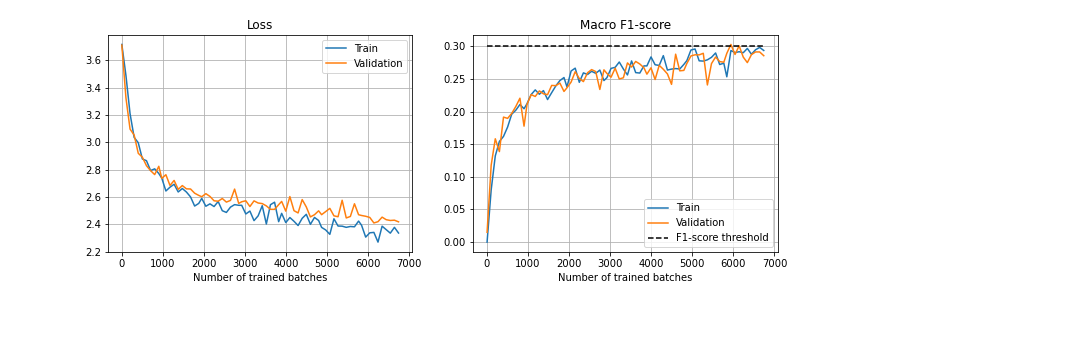

/home/aravind/conda/envs/dml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aravind/conda/envs/dml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

In [ ]:
# YOUR CODE HERE
rnn = RNN(len(charset), 2**8, len(names_dict)).to(device)
train(rnn, 7, 0.0001*2**4, 32, train_dataset, val_dataset)

### 1.6 Evaluation

Now that our model is trained, we can evaluate its predictions on the test set. 

In [ ]:
# Get all samples from the test set
x_test, y_test = test_dataset[:]

# Compute predictions
with torch.no_grad():
    test_out, _ = batch_forward_prop(rnn, x_test, y_test)

# Transform them into hard predictions
preds = test_out.argmax(dim=1)

# Get `preds` as a numpy array
preds = preds.cpu().numpy()

Using these predictions, we can compute the confusion matrix on the test set as follows.

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
y_true = y_test.cpu().numpy()
cm = confusion_matrix(y_true, preds)
cm = cm.astype('float64')

# Normalize each row
for i in range(cm.shape[0]):
    cm[i, :] = cm[i, :] / sum(cm[i, :])
    
cm

array([[0.15441176, 0.01470588, 0.03676471, ..., 0.        , 0.03676471,
        0.01470588],
       [0.06666667, 0.11111111, 0.        , ..., 0.02222222, 0.        ,
        0.        ],
       [0.11639344, 0.00163934, 0.05245902, ..., 0.0147541 , 0.01639344,
        0.01967213],
       ...,
       [0.        , 0.        , 0.        , ..., 0.74747475, 0.00505051,
        0.01010101],
       [0.00543478, 0.00543478, 0.        , ..., 0.01630435, 0.66847826,
        0.05434783],
       [0.        , 0.        , 0.        , ..., 0.02380952, 0.02380952,
        0.73809524]])

In order to make this easier to visualize, let's plot it as a heat map:

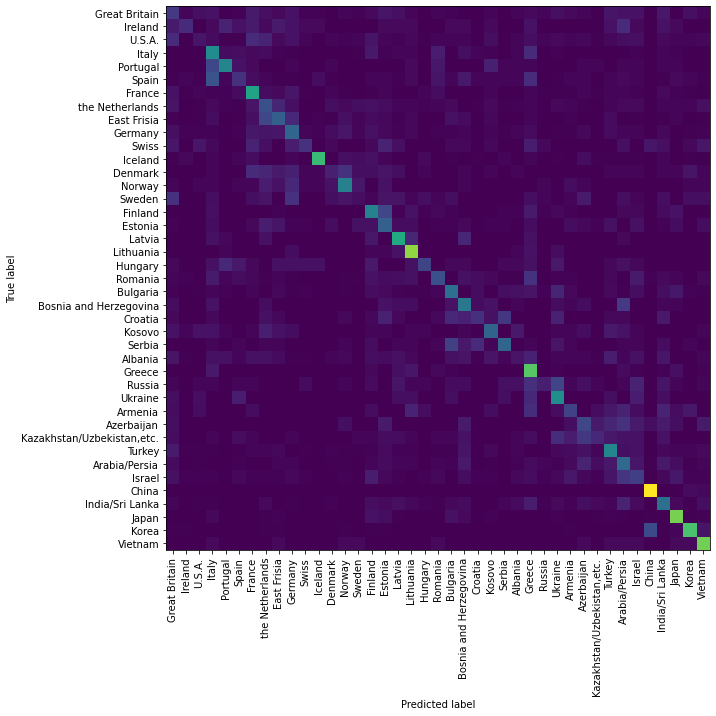

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(cm)
plt.xticks(range(len(names_dict)), names_dict.keys(), rotation='vertical')
plt.yticks(range(len(names_dict)), names_dict.keys())
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
def evaluate(name_tensor):
    with torch.no_grad():
        hidden = torch.zeros(1, rnn.hidden_size).to(device)
        for i in range(name_tensor.shape[1]):
            output, hidden = rnn(name_tensor[:, i, :], hidden)
    return output.exp()

def predict(input_line, n_predictions=5):
    tensor = name2tensor(input_line).to(device)[None, :]
    output = evaluate(tensor)

    # Get top N categories
    topv, topi = output.topk(n_predictions, 1, True)
    topv, topi = topv[0], topi[0]
        
    cats = [list(names_dict.keys())[i] for i in topi.cpu().numpy()]
    vs = topv.cpu().numpy()

    plt.figure(figsize=(10,3))
    plt.bar(range(len(vs)), vs)
    plt.xticks(range(len(vs)), cats)

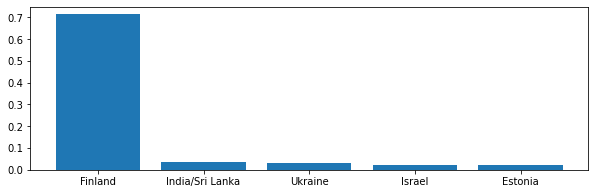

In [ ]:
predict('Åsakvi')

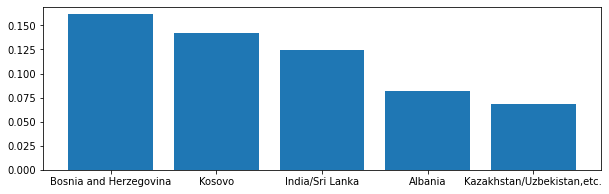

In [ ]:
predict('Harakabim')

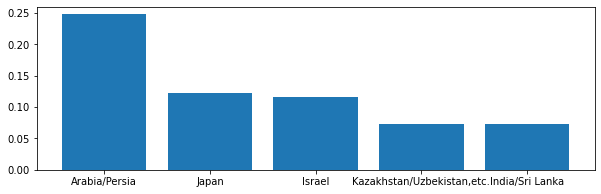

In [ ]:
predict('Alakazam')

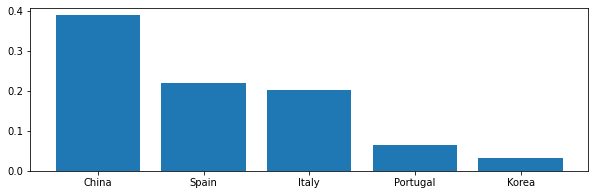

In [ ]:
predict('Jin Quaio')

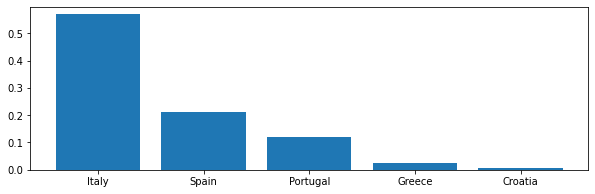

In [ ]:
predict('Leonardino')

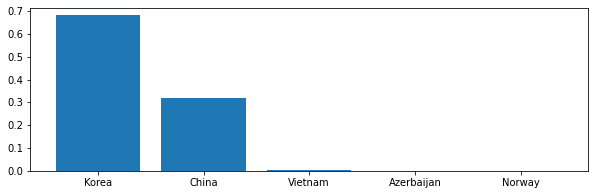

In [ ]:
predict('Kim Sung')

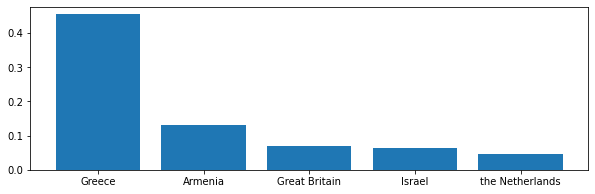

In [ ]:
predict('Thanos')

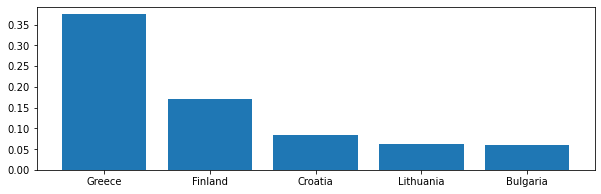

In [ ]:
predict('Viiviika')

Experiment on new names using the next cell:

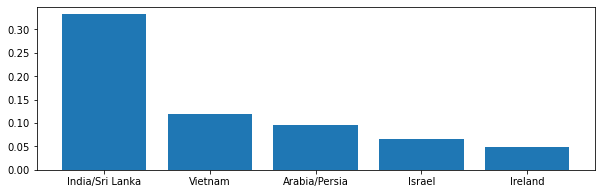

In [ ]:
predict('ram')